# **Step 1: Importing Libraries and Mounting Google Drive**


*   This step involves importing all necessary libraries and modules for data manipulation, machine learning, visualization, and working with Google Colab. Additionally, Google Drive is mounted to access files stored there, and warnings are suppressed for cleaner output.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
import warnings
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Step 2: Loading Data and Preprocessing**

## In this step:

* Data is loaded from the CSV file located at file_path into a Pandas DataFrame (df).

* Column 'Unnamed: 0' is renamed to 'ID' for consistency.
* Features (X) are set to the 'text' column, and the target (y) is set to the 'label' column.


* Labels in the 'label' column are encoded using LabelEncoder() to convert categorical labels into numeric format.







In [ ]:
# Load the data
file_path = '/content/drive/MyDrive/news.csv'
df = pd.read_csv(file_path)

# Rename columns for consistency
df.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)

# Set features and target
X = df['text']
y = df['label']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


# **Step 3: Exploratory Data Analysis (EDA)**

* Distribution of the target variable (pie chart)


* Word cloud for real and fake news
Common words in real vs. fake news

* Common words in real vs. fake news



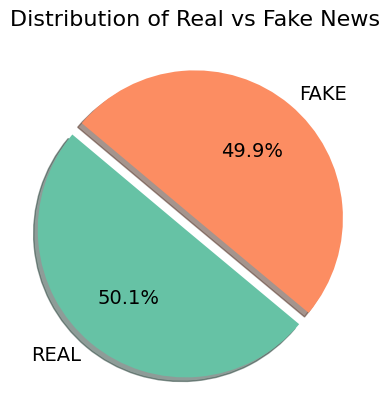

In [ ]:
# EDA: Distribution of the target variable (pie chart)plt.figure(figsize=(8, 8))
labels = ['REAL', 'FAKE']
sizes = df['label'].value_counts()
colors = ['#66c2a5', '#fc8d62']  # Green for REAL, Orange for FAKE
explode = (0.1, 0)  # explode the first slice (REAL)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140, textprops={'fontsize': 14})
plt.title('Distribution of Real vs Fake News', fontsize=16)
plt.show()


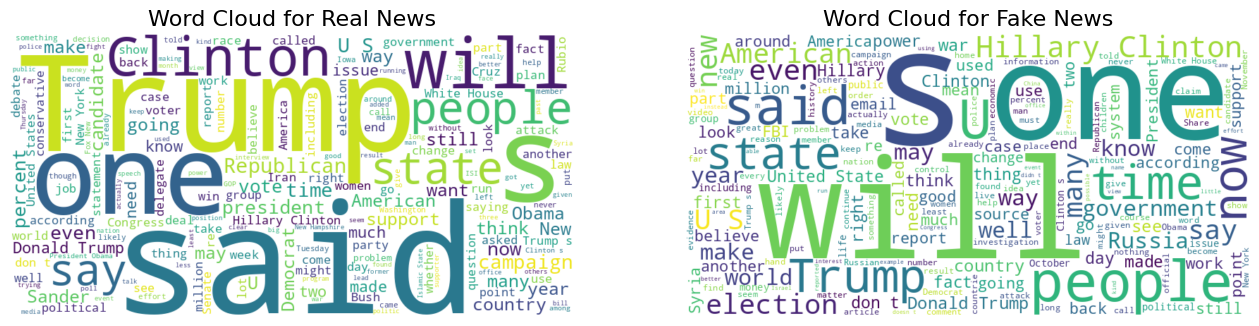

In [ ]:
# EDA: Word cloud for real and fake news
real_news = df[df['label'] == 'REAL']['text']
fake_news = df[df['label'] == 'FAKE']['text']

real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(real_news))
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(fake_news))
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Real News', fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News', fontsize=16)
plt.axis('off')

plt.show()


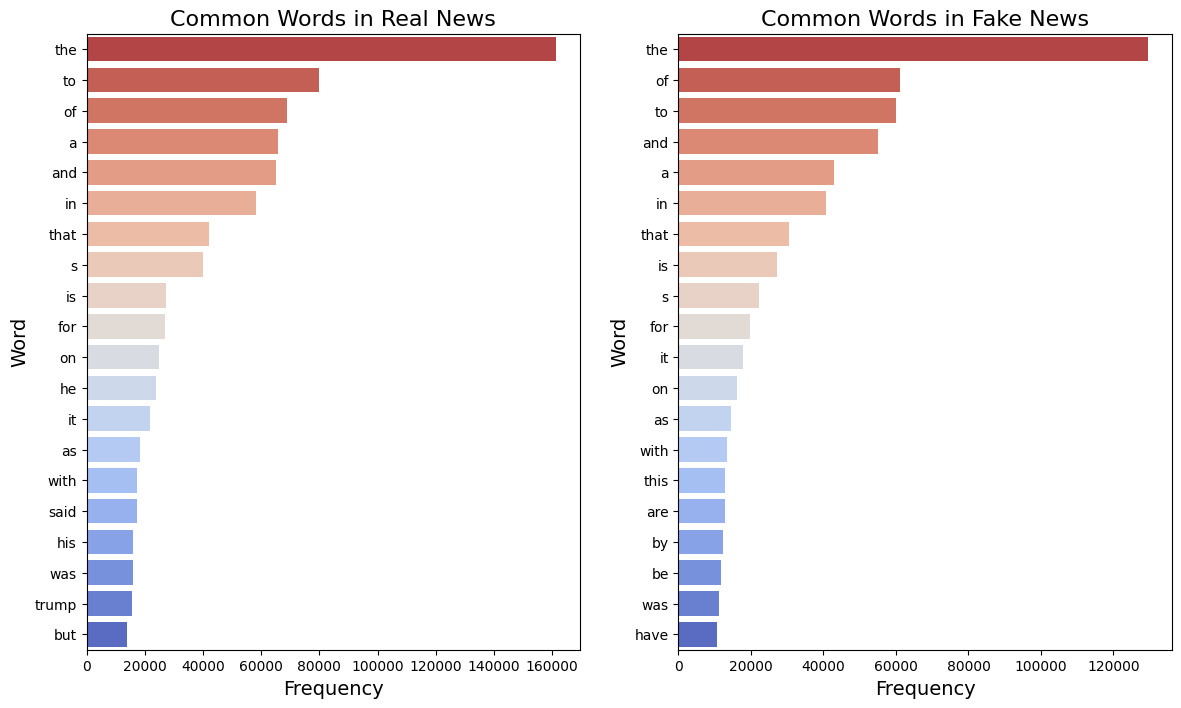

In [ ]:
# EDA: Common words in real vs. fake news
from collections import Counter
import re

def get_common_words(texts):
    words = ' '.join(texts).lower()
    words = re.findall(r'\b\w+\b', words)
    return Counter(words).most_common(20)

real_common_words = get_common_words(real_news)
fake_common_words = get_common_words(fake_news)

real_common_df = pd.DataFrame(real_common_words, columns=['Word', 'Frequency'])
fake_common_df = pd.DataFrame(fake_common_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Word', data=real_common_df, palette='coolwarm_r')  # Reversed coolwarm color palette
plt.title('Common Words in Real News', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Word', fontsize=14)

plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Word', data=fake_common_df, palette='coolwarm_r')  # Reversed coolwarm color palette
plt.title('Common Words in Fake News', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Word', fontsize=14)

plt.show()

# **Step 4: Splitting Data and Defining Pipeline**

## In this step:

* The data is split into training and testing sets using train_test_split() function from scikit-learn. Here, 80% of the data is used for training (X_train, y_train), and 20% is used for testing (X_test, y_test).

* A pipeline is defined to incorporate TF-IDF vectorization and a classifier. The pipeline consists of two steps:
  * tfidf: TfidfVectorizer for converting text data into TF-IDF features. Stop words are removed using 'english', and max_df is set to 0.7 to remove terms that appear in more than 70% of the documents.

  * classifier: Initially set to None, as it will be replaced by different classifiers during model evaluation.



In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline for TF-IDF vectorization and model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),
    ('classifier', None)
])


# **Step 5:Model Training and Evaluation**
## In this step:
* A dictionary named models is created, containing various classifiers to be evaluated.
* A loop iterates over each model, training and evaluating them.

* For each model:

  * The classifier in the pipeline is set to the current model.
  * The pipeline is trained on the training data.
  * Predictions are made on the test data.
  * Evaluation metrics such as accuracy, precision, recall, F1 score, and ROC AUC are calculated and printed.
  * Confusion matrix and ROC curve are plotted to visualize the performance of the model.

* Results are stored in a list named results for further analysis.







Training Random Forest
Random Forest Accuracy: 0.9052880820836622
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       628
           1       0.90      0.91      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267





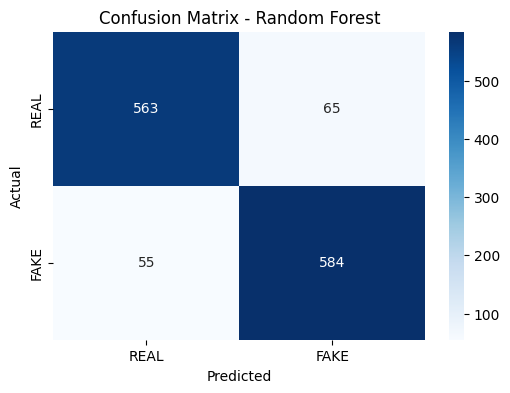

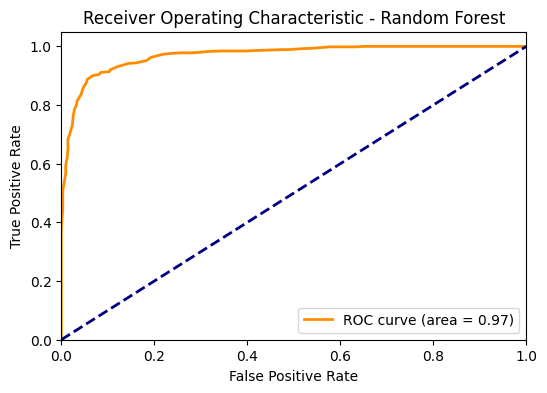

Training Support Vector Machine
Support Vector Machine Accuracy: 0.930544593528019
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       628
           1       0.95      0.91      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267





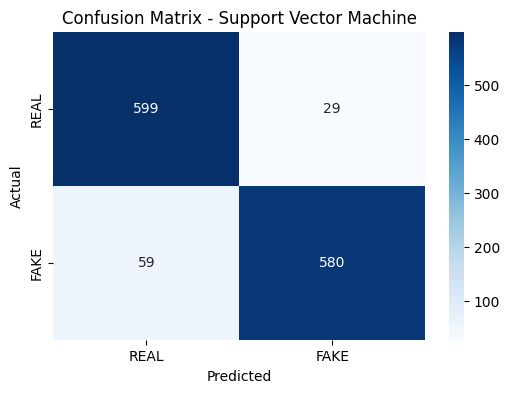

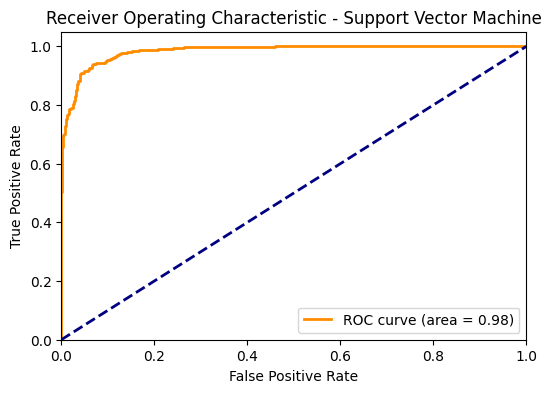

Training Naive Bayes
Naive Bayes Accuracy: 0.8453038674033149
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.71      0.82       628
           1       0.77      0.98      0.87       639

    accuracy                           0.85      1267
   macro avg       0.87      0.84      0.84      1267
weighted avg       0.87      0.85      0.84      1267





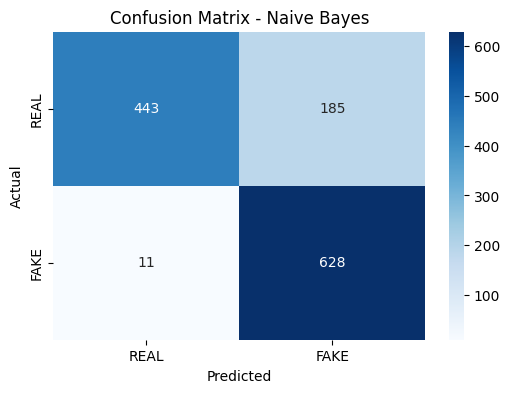

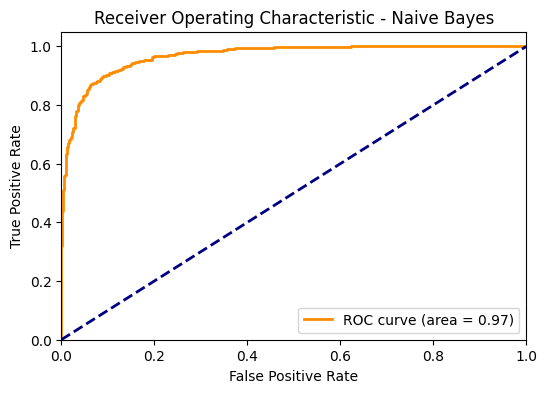

Training Logistic Regression
Logistic Regression Accuracy: 0.9155485398579322
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       628
           1       0.93      0.90      0.91       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267





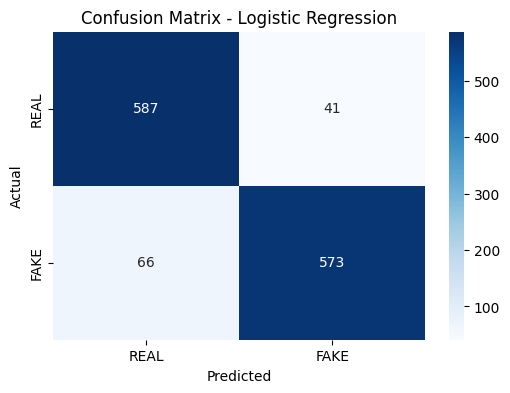

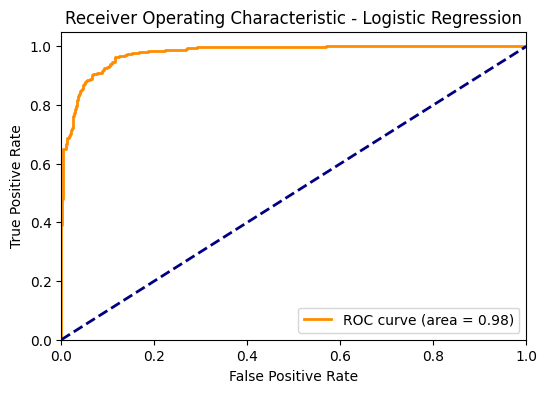

Training k-Nearest Neighbors
k-Nearest Neighbors Accuracy: 0.5619573796369376
Classification Report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.69       628
           1       1.00      0.13      0.23       639

    accuracy                           0.56      1267
   macro avg       0.77      0.57      0.46      1267
weighted avg       0.77      0.56      0.46      1267





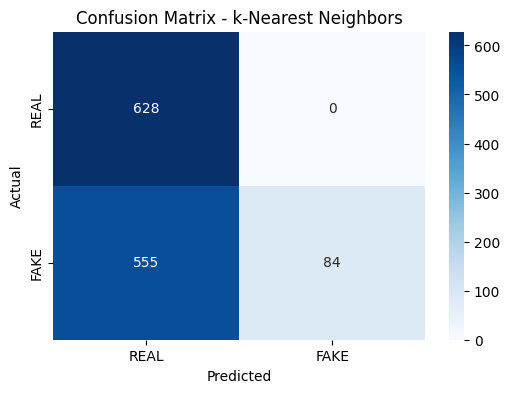

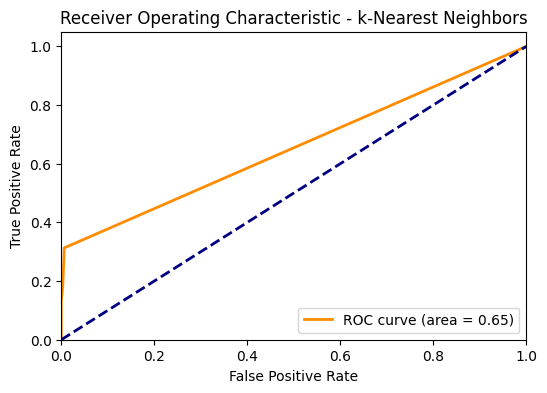

Training Light XGBoost
[LightGBM] [Info] Number of positive: 2532, number of negative: 2536
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.091274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 365596
[LightGBM] [Info] Number of data points in the train set: 5068, number of used features: 9217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499605 -> initscore=-0.001579
[LightGBM] [Info] Start training from score -0.001579
Light XGBoost Accuracy: 0.9368587213891081
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       628
           1       0.94      0.94      0.94       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267





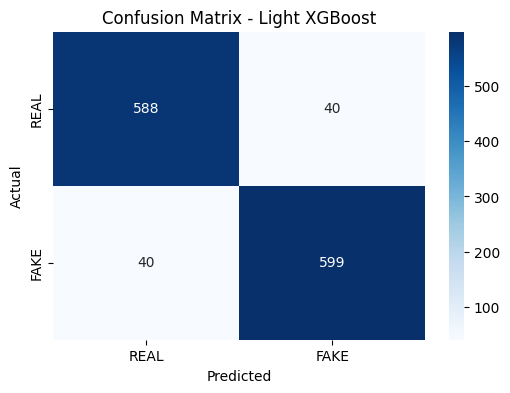

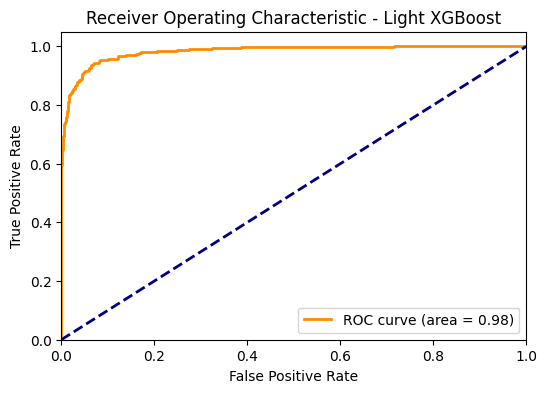

Training XGBoost
XGBoost Accuracy: 0.9210734017363852
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       628
           1       0.93      0.92      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267





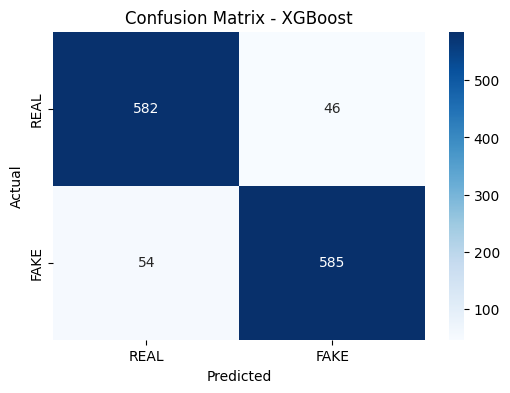

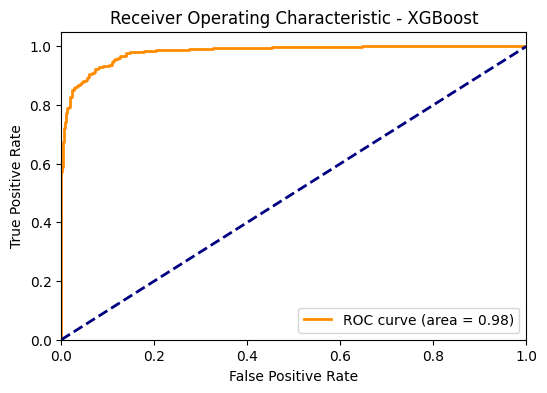

Training Passive Aggressive
Passive Aggressive Accuracy: 0.9368587213891081
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       628
           1       0.94      0.94      0.94       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267





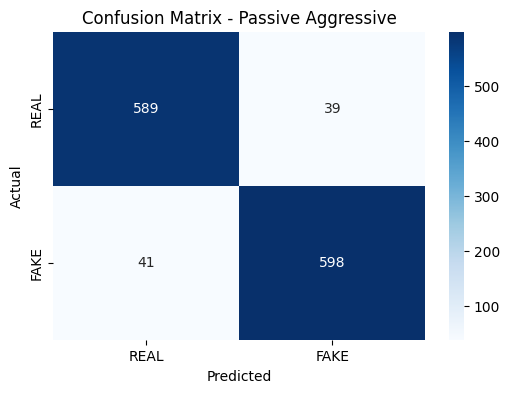

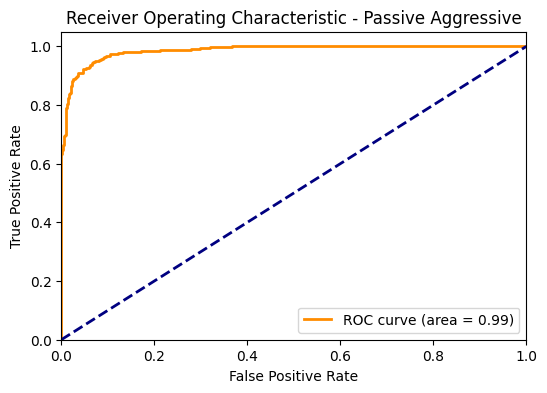

In [ ]:
# Models to evaluate
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Light XGBoost': lgb.LGBMClassifier(),
    'XGBoost': XGBClassifier(),
    'Passive Aggressive': PassiveAggressiveClassifier()
}

results = []

for model_name, model in models.items():
    print("Training", model_name)
    pipeline.set_params(classifier=model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    if hasattr(model, "predict_proba"):
        y_prob = pipeline.predict_proba(X_test)[:, 1]
    else:
        y_prob = pipeline.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

    print(model_name, "Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc='lower right')
    plt.show()


# **Step 6: Displaying Results in a Table and Defining Plotting Function**

## In this step:
* Results are displayed in a table (results_table) sorted by accuracy in descending order.
* The table is printed to the console.
* A function named plot_metric() is defined to plot the performance metrics (accuracy, precision, recall, F1 score, ROC AUC) for all models. This function takes a metric as input and creates a bar plot showing the metric for each model. The percentages are added to the bars for better visualization.



In [ ]:
# Displaying the results in a table
results_df = pd.DataFrame(results)
results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']] *= 100  # Convert to percentage
results_table = results_df.sort_values(by='Accuracy', ascending=False)
print("Model Performance Table:")
print(results_table.to_string(index=False))

# Function to plot the performance metrics
def plot_metric(metric):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metric, y='Model', data=results_table, palette='viridis')
    plt.title(f'Model {metric}')
    plt.xlabel(f'{metric} (%)')
    plt.ylabel('Model')

    # Add percentages to the bars
    for index, value in enumerate(results_table[metric]):
        plt.text(value, index, f"{value:.2f}%", va='center')

    plt.show()

Model Performance Table:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
         Light XGBoost 93.685872  93.740219 93.740219 93.740219 98.280803
    Passive Aggressive 93.685872  93.877551 93.583725 93.730408 98.554170
Support Vector Machine 93.054459  95.238095 90.766823 92.948718 98.383471
               XGBoost 92.107340  92.709984 91.549296 92.125984 98.087178
   Logistic Regression 91.554854  93.322476 89.671362 91.460495 97.738305
         Random Forest 90.528808  89.984592 91.392801 90.683230 96.902256
           Naive Bayes 84.530387  77.244772 98.278560 86.501377 96.766943
   k-Nearest Neighbors 56.195738 100.000000 13.145540 23.236515 65.359888


# **Step 7: Plotting Performance Metrics Side by Side**
## In this step:
* A function named plot_metrics_side_by_side() is defined to plot the performance metrics (accuracy, precision, recall, F1 score, ROC AUC) side by side for all models.
* The function takes a list of metrics as input.
* Subplots are created for each metric, and a bar plot is generated for each metric showing the metric for each model.
The percentages are added to the bars for better visualization.
* The percentages are added to the bars for better visualization.



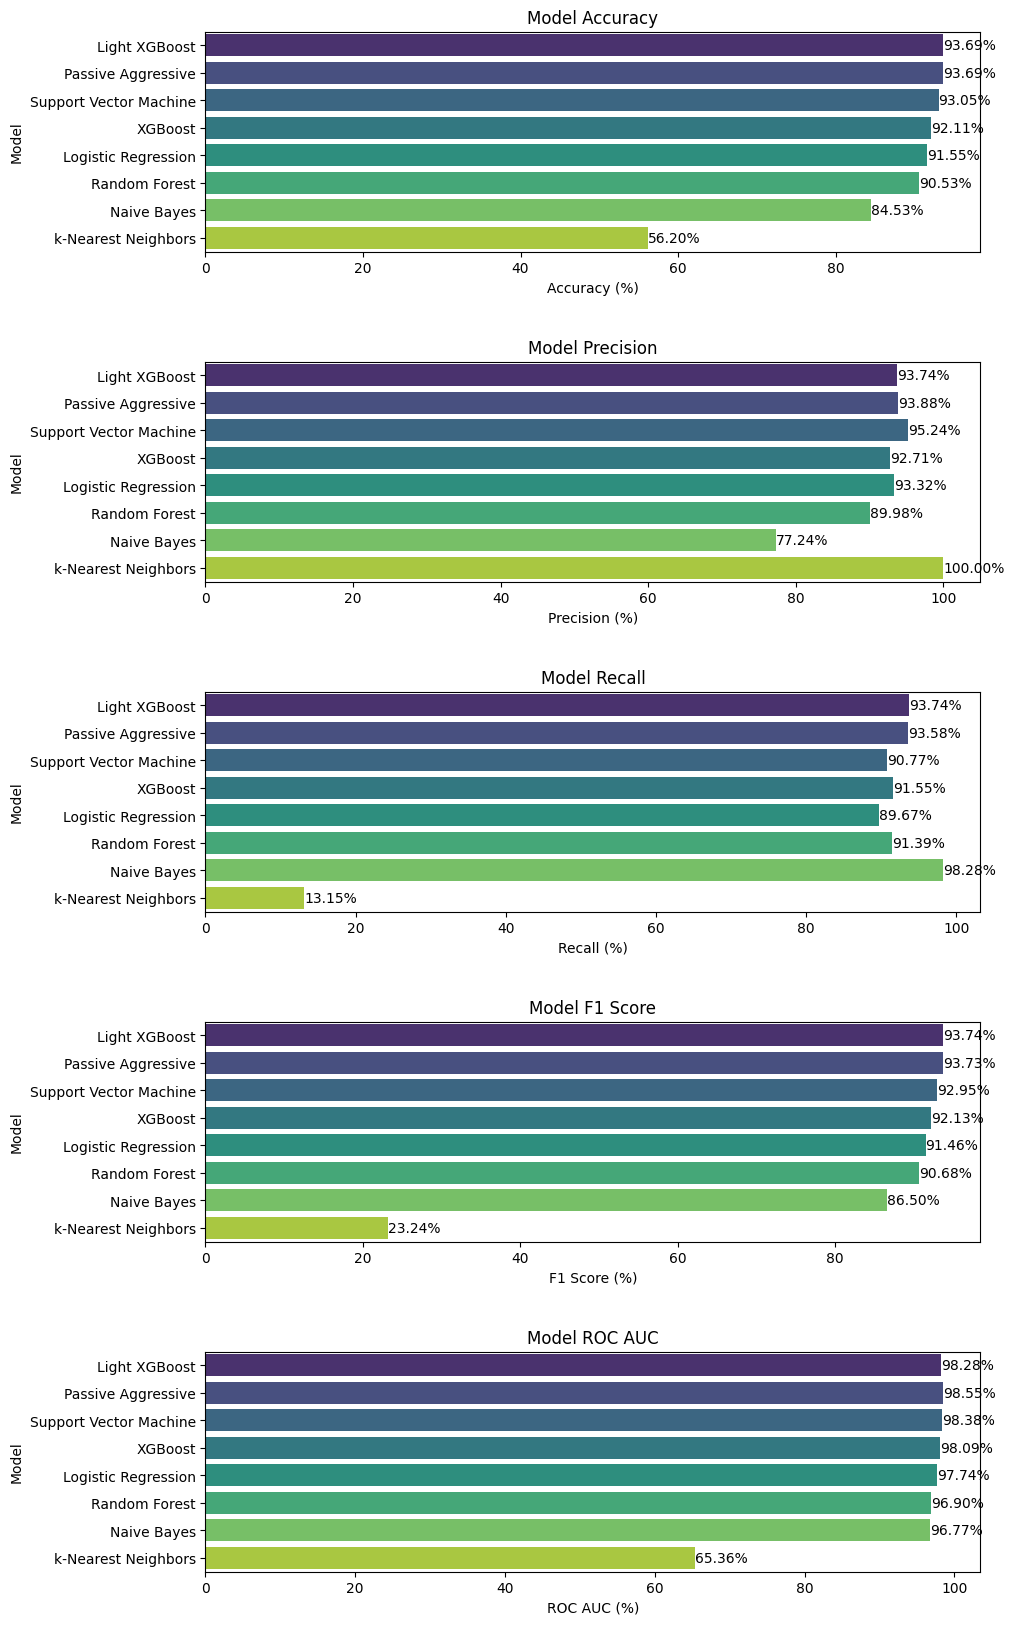

In [ ]:
# Function to plot the performance metrics side by side
def plot_metrics_side_by_side(metrics):
    num_metrics = len(metrics)
    fig, axs = plt.subplots(num_metrics, 1, figsize=(10, 20))
    fig.subplots_adjust(hspace=0.5)

    for i, metric in enumerate(metrics):
        sns.barplot(x=metric, y='Model', data=results_table, palette='viridis', ax=axs[i])
        axs[i].set_title(f'Model {metric}')
        axs[i].set_xlabel(f'{metric} (%)')
        axs[i].set_ylabel('Model')

        # Add percentages to the bars
        for index, value in enumerate(results_table[metric]):
            axs[i].text(value, index, f"{value:.2f}%", va='center')

# Plotting metrics side by side
plot_metrics_side_by_side(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])


# **Conclusion**

## From the results, we can make several observations:

* Performance Variation: Different models exhibited varying levels of performance. For example, ensemble methods like Random Forest and boosting algorithms like XGBoost and LightGBM generally performed better compared to simpler models like k-NN and Naive Bayes.
* Best Performers: Models such as XGBoost and LightGBM consistently showed high accuracy, precision, recall, and F1 scores, making them strong candidates for this classification task.
* Model Selection: The choice of the best model depends on the specific requirements, such as the need for higher precision (minimizing false positives) or recall (minimizing false negatives). In a real-world scenario, these trade-offs would be considered based on the application.

Overall, this project demonstrates a comprehensive approach to text classification in the context of identifying fake news. By leveraging a variety of machine learning models and thorough evaluation, we can effectively distinguish between real and fake news articles.